## Project
   **Zillow Clustering**
 
### Goal
   **Discover the drivers of the log error.**

**What is log error?**
- Its the difference of log of Zesimate and the log of actual sale price


### Agenda:
- Executive Summary    
- Phases
- Summary

### Executive Summary
- Goal: discover the driver of log error
- Explored and identified few variables that influenced log error
- Group those variable and created clusters with them
- Clusters were used in model building

**Lets get the necessary imports**

In [315]:
import acquire
import pandas as pd
import numpy as np
from scipy import stats
import wrangle_zillow
import explore
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Acquire

**Let's acquire the zillow data set.**
- We have already created a function named **get_data** that runs the sql query and reads the data from the sql database. The function is store in the **acquire.py** module

In [316]:
df = acquire.get_data()

## Prepare

**For this project, we are using the observations that are of single unit type**
- We will be filtering the properties based on their property land use type id 
- Also, while acquring the data, some duplicated columns were acquired too. So, we will remove those as well.
- Function **get_single_unit** removes the duplicated columns and filters the dataframe based on the property land use type id and returns a data frame.
- This function is stored in the **wrangle_zillow.py** module

In [317]:
zillow = wrangle_zillow.get_single_unit(df)

In [318]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52357 entries, 0 to 77413
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52357 non-null  int64  
 1   parcelid                      52357 non-null  int64  
 2   airconditioningtypeid         13619 non-null  float64
 3   architecturalstyletypeid      70 non-null     float64
 4   basementsqft                  47 non-null     float64
 5   bathroomcnt                   52357 non-null  float64
 6   bedroomcnt                    52357 non-null  float64
 7   buildingclasstypeid           0 non-null      float64
 8   buildingqualitytypeid         33665 non-null  float64
 9   calculatedbathnbr             52195 non-null  float64
 10  decktypeid                    389 non-null    float64
 11  finishedfloor1squarefeet      4371 non-null   float64
 12  calculatedfinishedsquarefeet  52250 non-null  float64
 13  f

**Lets get the summary of missing values**
- We will use the **get_missing_col_summary** function which outputs a dataframe with the number of rows missing values in a column and its percentage
- We will use **get_missing_row_summary** function which outputs a datframe with the number of missing columns and the number of rows
- Both of these function are in the **wrangle_zillow.py** module

In [319]:
wrangle_zillow.get_missing_col_summary(zillow)

,Number of rows missing,pct of rows missing
id,0,0.000000
parcelid,0,0.000000
airconditioningtypeid,38738,73.988196
architecturalstyletypeid,52287,99.866303
basementsqft,52310,99.910232
...,...,...
airconditioningdesc,38738,73.988196
architecturalstyledesc,52287,99.866303
heatingorsystemdesc,18497,35.328609
storydesc,52310,99.910232


In [320]:
wrangle_zillow.get_missing_row_summary(zillow)

,num_cols_missing,num_rows,pct_cols_missing
0,33,11968,48.529412
1,34,11160,50.000000
2,32,8886,47.058824
3,31,5993,45.588235
4,36,4138,52.941176
5,35,3470,51.470588
6,29,2528,42.647059
7,30,2199,44.117647
8,37,1020,54.411765
9,28,390,41.176471


**Handling missing values from rows and columns**
- We will remove the column with more than certain percentage of rows missing values
- We will remove rows with more than certain percentage of rows missing values
- This is done with the **handle_missing_values** function that takes the proportion as arguments
- This function is stored in the **wrangle_zillow.py**

In [321]:
# so, we will remove columns with more than 20% of missing values, and rows with more that 40% of
# missing values.
zillow = wrangle_zillow.handle_missing_values(zillow, .8, .6)

In [323]:
# lets check how many missing values we have left
zillow.isna().sum()

id                                 0
parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedbathnbr                162
calculatedfinishedsquarefeet     107
finishedsquarefeet12             273
fips                               0
fullbathcnt                      162
latitude                           0
longitude                          0
lotsizesquarefeet                375
propertycountylandusecode          0
propertylandusetypeid              0
rawcensustractandblock             0
regionidcity                    1036
regionidcounty                     0
regionidzip                       26
roomcnt                            0
yearbuilt                        140
structuretaxvaluedollarcnt        82
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          4
censustractandblock              125
logerror                           0
t

Before we move on to handling the missing values, we will remove redundant columns, repeated columns. We will use the **clean_zillow** function for that

In [324]:
zillow = wrangle_zillow.clean_zillow(zillow)

**Lets check for outliers**

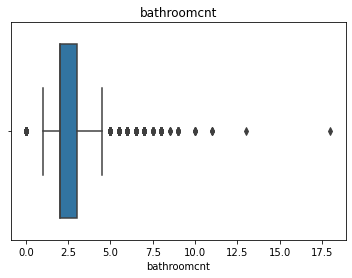

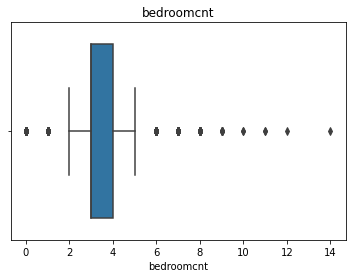

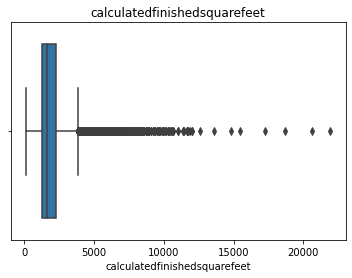

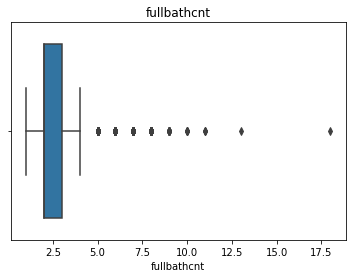

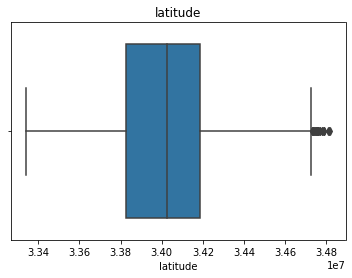

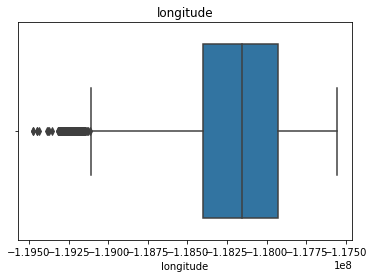

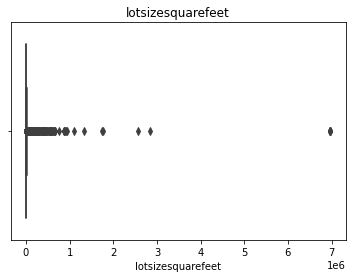

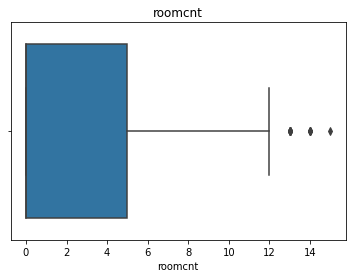

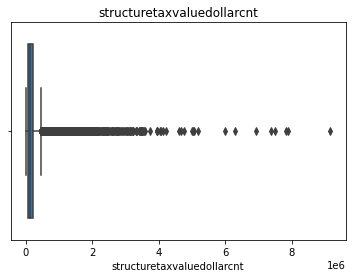

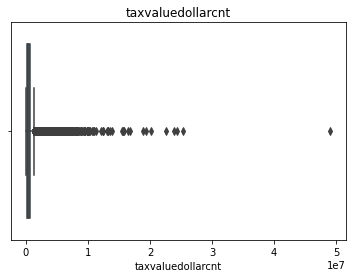

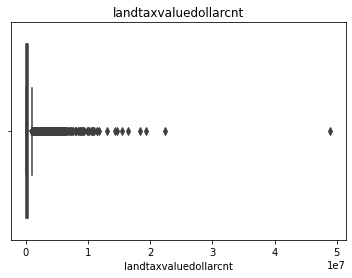

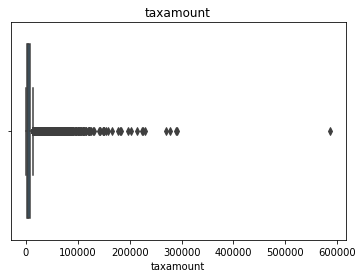

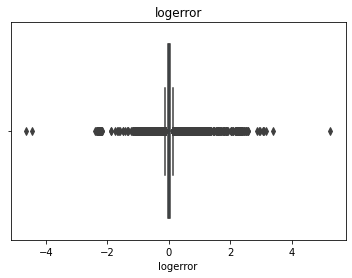

In [326]:
# lets check if we have outliers in numeric datatypes

cols_to_check = ['bathroomcnt', 'bedroomcnt','calculatedfinishedsquarefeet','fullbathcnt', 'latitude',
                'longitude', 'lotsizesquarefeet','roomcnt','structuretaxvaluedollarcnt','taxvaluedollarcnt',
                'landtaxvaluedollarcnt','taxamount','logerror']
for col in cols_to_check:
    sns.boxplot(zillow[col])
    plt.title(col)
    plt.show()

**Takeaways:**
- Most of these columns have significant number of outliers in them.

**Removing Outliers:**
- We will use the **check_outliers** function from the **wranggle_zillow.py** module to remove the outliers from the columns we have identiffied above.

In [327]:
cols_to_check = ['bathroomcnt', 'bedroomcnt','calculatedfinishedsquarefeet','fullbathcnt', 'latitude',
                'longitude', 'lotsizesquarefeet','roomcnt','structuretaxvaluedollarcnt','taxvaluedollarcnt',
                'landtaxvaluedollarcnt','taxamount','logerror']
zillow = wrangle_zillow.check_outliers(zillow, cols_to_check = cols_to_check)

**Splitting Data**
- We will use the **split_zillow** function stored in **wrangle_zillow.py** module in order to split out data. The test is 20% of the data, and the validate is 20% of the data.

In [328]:
train, test, validate = wrangle_zillow.split_zillow(zillow)

train.shape, test.shape, validate.shape

((21286, 24), (6652, 24), (5322, 24))

In [329]:
train.isnull().sum()

id                                0
parcelid                          0
bathroomcnt                       0
bedroomcnt                        0
calculatedfinishedsquarefeet      0
fips                              0
fullbathcnt                       0
latitude                          0
longitude                         0
lotsizesquarefeet                 0
propertycountylandusecode         0
regionidcity                    346
regionidcounty                    0
regionidzip                       0
roomcnt                           0
yearbuilt                         5
structuretaxvaluedollarcnt        0
taxvaluedollarcnt                 0
assessmentyear                    0
landtaxvaluedollarcnt             0
taxamount                         0
logerror                          0
transactiondate                   0
propertylandusedesc               0
dtype: int64

**Takeaways:**
- There are only few columns with null values. They all seem to be a categroical type


In [330]:

cat_cols = ['regionidcity', 'regionidzip', 'yearbuilt']
train, test, validate = wrangle_zillow.fill_na(train, test, validate, cat_cols = cat_cols, cont_cols = [])




**Lets do some feature engineering**
- We are creating three new columns: 
    - bathtobed: ratio of bathroom to bedroom
    - pricepersqfeet: price per square feet of the structure
    - age: difference between this year and the year the property was built


In [331]:
# creating a new feature named bathtobed which is the ratio of number of bathroom per number of bedroom 
train['bathtobed'] = round(train.bathroomcnt/train.bedroomcnt, 2)
test['bathtobed'] = round(test.bathroomcnt/test.bedroomcnt, 2)
validate['bathtobed'] = round(validate.bathroomcnt/validate.bedroomcnt, 2)

# creating a new feature named pricepersqfeet whihc is the structuretaxvaluedollarcnt divided by finished square feet
train['pricepersqfeet'] = train.structuretaxvaluedollarcnt/train.calculatedfinishedsquarefeet
test['pricepersqfeet'] = test.structuretaxvaluedollarcnt/test.calculatedfinishedsquarefeet
validate['pricepersqfeet'] = validate.structuretaxvaluedollarcnt/validate.calculatedfinishedsquarefeet

# creating a new feature named age, the age of the property. Calulated by subtracting the year it was built from this year
train['age'] = 2020 - train.yearbuilt
test['age'] = 2020 - test.yearbuilt
validate['age'] = 2020 - validate.yearbuilt

## Explore

In [332]:
train.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,propertylandusedesc,bathtobed,pricepersqfeet,age
74617,672837,10829183,2.0,3.0,1830.0,6037.0,2.0,34199865.0,-118454861.0,6190.0,...,486000.0,2016.0,322500.0,4485.80,0.029209,2017-09-08,Single Family Residential,0.67,89.344262,71.0
56140,1442644,13986612,2.0,3.0,1348.0,6059.0,2.0,33820949.0,-117985551.0,7992.0,...,65191.0,2016.0,24102.0,984.54,0.033456,2017-07-12,Single Family Residential,0.67,30.481454,65.0
64845,1160533,14309513,2.0,2.0,1270.0,6059.0,2.0,33661615.0,-117824423.0,3200.0,...,567000.0,2016.0,470455.0,5796.84,-0.005060,2017-08-09,Single Family Residential,1.00,76.019685,53.0
20892,2424519,12736577,3.0,4.0,2829.0,6037.0,3.0,33911002.0,-117994037.0,7113.0,...,632524.0,2016.0,285553.0,7879.00,-0.000302,2017-03-28,Single Family Residential,0.75,122.647932,35.0
41369,2420965,11855148,2.0,3.0,1493.0,6037.0,2.0,34042065.0,-118122329.0,10958.0,...,79837.0,2016.0,30001.0,1345.56,0.067074,2017-05-31,Single Family Residential,0.67,33.379772,66.0


**How is log error distributed amongst different fips code?**

In [333]:
# lets groupby our data on fips and get some discriptive stats on log error

train.groupby('fips').logerror.describe()


,count,mean,std,min,25%,50%,75%,max
fips,,,,,,,,
6037.0,14024.0,0.002332,0.044781,-0.114342,-0.024853,0.002849,0.028876,0.125419
6059.0,6100.0,0.006808,0.039281,-0.114288,-0.016130,0.006040,0.028525,0.125414
6111.0,1162.0,0.004200,0.036386,-0.113457,-0.015638,0.003290,0.024845,0.123814


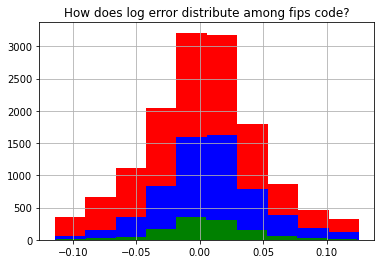

In [334]:
# plotting histogram of the log error in different fips code

ax = train[train.fips == 6037.0].logerror.hist(color = 'red')
train[train.fips == 6059.0].logerror.hist(ax = ax, color = 'blue')
train[train.fips == 6111.0].logerror.hist(ax = ax, color = 'green')
plt.title("How does log error distribute among fips code?")
plt.show()

**Takeaways:**
- The log error seems evenly distributed amongst different fips code. However, the count in one area is significntly higher than the other. 

**Does individual zipcode influence the logerror?** 
- Lets find out by doing a one sample t test of each unique zip code's mean log error and compare it with the overall population's log error

In [335]:
# zipcode where the log error is higher than the overall mean
high_zipcode = explore.get_zip_with_high_logerror(train)


# zip code where the log error is lower than the overall mean
low_zipcode = explore.get_zip_with_low_logerror(train)

print(high_zipcode)
print()

print(low_zipcode)

[96995.0, 97078.0, 96374.0, 96469.0, 96464.0, 96971.0, 97068.0, 96987.0, 96387.0, 96959.0, 96985.0, 96957.0, 96217.0, 96486.0, 96956.0, 96103.0, 96030.0]

[]


**Takeaways:**
   - There are certain zipcodes where the log error is significantly higher than the average logerror
   - We can use this features later on to create clusters
 

**How does number of bedroom count and bathroom count influence log error**
- ANOVA Test to check if there is a relationship between the number of bathroom & bedroom and the log error.

<AxesSubplot:xlabel='logerror'>

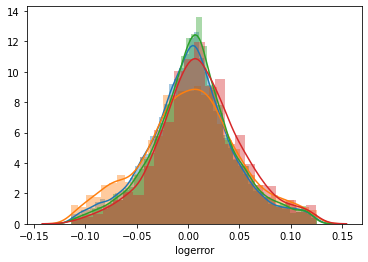

In [336]:
from scipy.stats import f_oneway, kruskal

# H_o = There is no difference in logerror as the bedroom count changes
# H_a = There is difference in logerror as the bedroom count changes

a = 0.05

x3 = train[train.bedroomcnt == 3].logerror
x2 = train[train.bedroomcnt == 2].logerror
x4 = train[train.bedroomcnt == 4].logerror
x5 = train[train.bedroomcnt == 5].logerror

# lets check the distribution of the log error

sns.distplot(train[train.bedroomcnt == 3].logerror)

sns.distplot(train[train.bedroomcnt == 2].logerror)

sns.distplot(train[train.bedroomcnt == 4].logerror)

sns.distplot(train[train.bedroomcnt == 5].logerror)

In [337]:
f, p = f_oneway(x2, x3, x4, x5)
f, p

if p < a:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


**Takeaways:**
- We reject the null hypothesis that there is no statistically significant differences between the means  of properties with different number of bedrooms


<AxesSubplot:xlabel='logerror'>

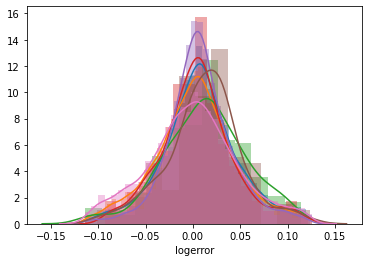

In [338]:
# H_o = There is no difference in logerror as the bedroom count changes
# H_a = There is difference in logerror as the bedroom count changes

a = 0.05

x3 = train[train.bathroomcnt == 3].logerror
x2 = train[train.bathroomcnt == 2].logerror
x4 = train[train.bathroomcnt == 4].logerror
x15 = train[train.bathroomcnt == 1.5].logerror
x25 = train[train.bathroomcnt == 2.5].logerror
x1 = train[train.bathroomcnt == 1].logerror

x35 = train[train.bathroomcnt == 3.5].logerror

# lets check the distribution of the log error

sns.distplot(train[train.bathroomcnt == 3].logerror)

sns.distplot(train[train.bathroomcnt == 2].logerror)

sns.distplot(train[train.bathroomcnt == 4].logerror)

sns.distplot(train[train.bathroomcnt == 1.5].logerror)
sns.distplot(train[train.bathroomcnt == 2.5].logerror)
sns.distplot(train[train.bathroomcnt == 3.5].logerror)
sns.distplot(train[train.bathroomcnt == 1].logerror)

In [339]:
f, p = f_oneway(x1,x2, x3, x4, x15, x25, x35)
f, p

if p < a:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


**Takeaways:**
- We reject the null hypothesis that there is no statistically significant differences between the means of properties with different number of bathrooms


**How does squarefeet of the property  influence log error**
- Lets run a Pearson R test

$H_o$: Squarefootage and the log error are independent of one another


In [340]:
# setting alpha
a = 0.05

r,p = stats.pearsonr(train.calculatedfinishedsquarefeet, train.logerror)
r,p

if p < a:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
# Not a strong correlation.

We reject the null hypothesis


**Takeaways:**
- We reject the null hypothesis that there is no relationship between calculatedfinishedsquarefeet and logerror
- However, the relatioship may not be as strong as indicated by low r score

**Let's split our train data into two dataframes to see if any thing pops out:**
- Over = dataframe where the log error is above 0, meaning zestimate was higher than the sale price
- Under = dataframe where the log error is under 0, meaning zestimate was lower than the sale price

In [341]:
over= train[train.logerror > 0]
under = train[train.logerror < 0]
under

,id,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,propertylandusedesc,bathtobed,pricepersqfeet,age
64845,1160533,14309513,2.0,2.0,1270.0,6059.0,2.0,33661615.0,-117824423.0,3200.0,...,567000.0,2016.0,470455.0,5796.84,-0.005060,2017-08-09,Single Family Residential,1.00,76.019685,53.0
20892,2424519,12736577,3.0,4.0,2829.0,6037.0,3.0,33911002.0,-117994037.0,7113.0,...,632524.0,2016.0,285553.0,7879.00,-0.000302,2017-03-28,Single Family Residential,0.75,122.647932,35.0
13350,1432372,17133935,2.0,4.0,1505.0,6111.0,2.0,34228925.0,-119038891.0,8030.0,...,279176.0,2016.0,111666.0,2982.84,-0.019131,2017-02-28,Single Family Residential,0.50,111.302326,55.0
72608,1540382,11541959,1.0,2.0,1000.0,6037.0,1.0,34002165.0,-118416661.0,5386.0,...,544369.0,2016.0,429870.0,6807.60,-0.106779,2017-08-31,Single Family Residential,0.50,114.499000,80.0
3501,1790892,17215386,2.0,4.0,1687.0,6111.0,2.0,34226265.0,-118894109.0,5682.0,...,638000.0,2016.0,414000.0,6724.18,-0.004023,2017-01-18,Single Family Residential,0.50,132.780083,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56385,407531,11724314,2.0,2.0,1425.0,6037.0,2.0,34018953.0,-118336689.0,6239.0,...,353354.0,2016.0,272620.0,4327.75,-0.112117,2017-07-13,Single Family Residential,1.00,56.655439,81.0
43411,1995050,14094915,3.0,4.0,2120.0,6059.0,3.0,33780867.0,-118043495.0,5200.0,...,93117.0,2016.0,28694.0,1478.66,-0.055554,2017-06-05,Single Family Residential,0.75,30.388208,54.0
8862,1429760,14499679,2.0,3.0,1561.0,6059.0,2.0,33646670.0,-117628848.0,5000.0,...,652298.0,2016.0,535904.0,6667.74,-0.013602,2017-02-09,Single Family Residential,0.67,74.563741,40.0
34468,1852728,11205973,2.0,3.0,1078.0,6037.0,2.0,34567740.0,-118063797.0,6601.0,...,159770.0,2016.0,39940.0,2797.79,-0.041556,2017-05-10,Single Family Residential,0.67,111.159555,35.0


**Lets see how different features are distributed between these over and under dataframes**

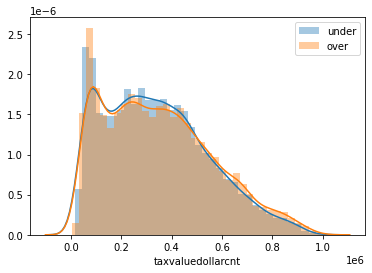

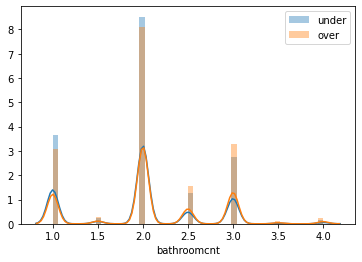

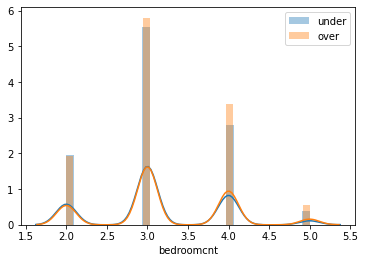

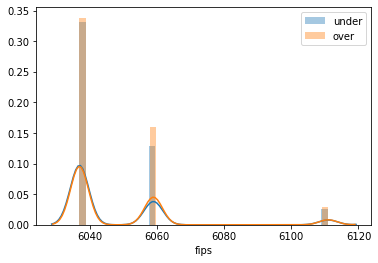

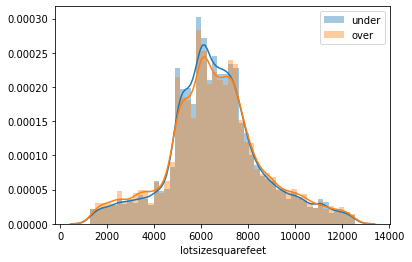

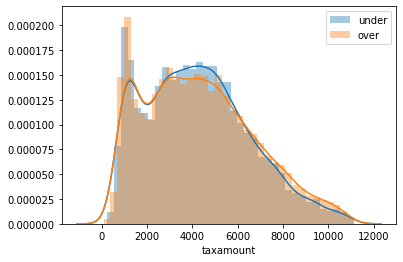

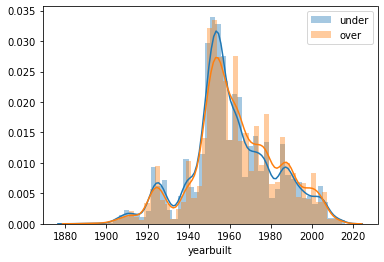

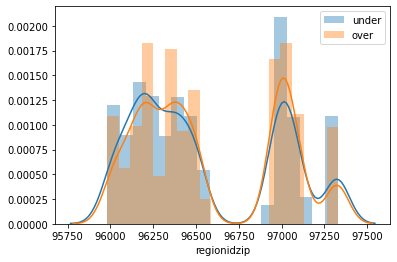

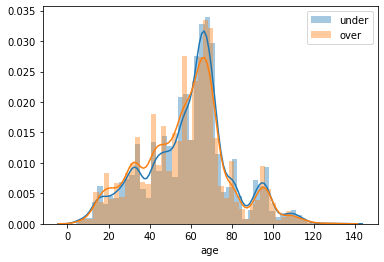

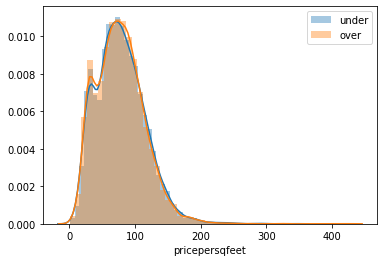

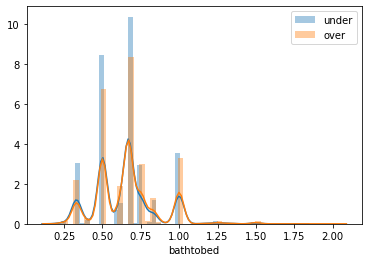

In [342]:
sns.distplot(under.taxvaluedollarcnt, label = 'under')
sns.distplot(over.taxvaluedollarcnt, label = 'over')
plt.legend()
plt.show()

sns.distplot(under.bathroomcnt, label = 'under')
sns.distplot(over.bathroomcnt, label = 'over')
plt.legend()
plt.show()


sns.distplot(under.bedroomcnt, label = 'under')
sns.distplot(over.bedroomcnt, label = 'over')
plt.legend()
plt.show()


sns.distplot(under.fips, label = 'under')
sns.distplot(over.fips, label = 'over')
plt.legend()
plt.show()

sns.distplot(under.lotsizesquarefeet, label = 'under')
sns.distplot(over.lotsizesquarefeet, label = 'over')
plt.legend()
plt.show()


sns.distplot(under.taxamount, label = 'under')
sns.distplot(over.taxamount, label = 'over')
plt.legend()
plt.show()

sns.distplot(under.yearbuilt, label = 'under')
sns.distplot(over.yearbuilt, label = 'over')
plt.legend()
plt.show()


sns.distplot(under.regionidzip, label = 'under')
sns.distplot(over.regionidzip, label = 'over')
plt.legend()
plt.show()

sns.distplot(under['age'], label = 'under')
sns.distplot(over['age'], label = 'over')
plt.legend()
plt.show()


sns.distplot(under.pricepersqfeet, label = 'under')
sns.distplot(over.pricepersqfeet, label = 'over')
plt.legend()
plt.show()


sns.distplot(under.bathtobed, label = 'under')
sns.distplot(over.bathtobed, label = 'over')
plt.legend()
plt.show()

**Takeaways**
- The distribution of majority of the selected features look the same between the observations in dataframe with overestimated log error and underestimated log error
- The features that stands out are:
   - regiondizip 
   - bathtobedratio
   - age
   - taxvalue
   - taxamount
- We can dig more into these features while clustering

**Some key drivers uncovered so far:**
 - regiondizip 
 - bathtobedratio
 - age
 - taxvalue
 - taxamount
 - bathroom count
 - bedroom count
 - squarefeet
 - fips

**Lets scale our data before we move on**
- We function to scale data **scale_data** uses the dataframe, specified columns to scale, and the scaler, and returns the dataframe with scaled columns appended and original columns dropped.
- This function is stored in **wrangle_zillow.py** module

In [343]:
from sklearn.preprocessing import MinMaxScaler


# get the list of the columns to scale
cols_to_scale = ['bathroomcnt', 'bedroomcnt','calculatedfinishedsquarefeet', 'fullbathcnt',
                'lotsizesquarefeet','roomcnt',  'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
                'landtaxvaluedollarcnt', 'taxamount',  'pricepersqfeet', 'age', 'bathtobed']  


# create the scaler object
scaler = MinMaxScaler()


# use the scaling function to scale the data and return the scaled version of the dataframe
train_scaled, test_scaled, validate_scaled = wrangle_zillow.scale_data(train, test, validate, scaler = scaler, 
                                                     cols_to_scale=cols_to_scale)

**Lets  create some clusters so that we can explore the data some more**

In [344]:
from sklearn.cluster import KMeans

**First of all we will create clusters using the features that represent the location of the property. We will name these features loc_features**
- Features used:
    - latitude
    - longitude
    - regionidzip
    - fips
  

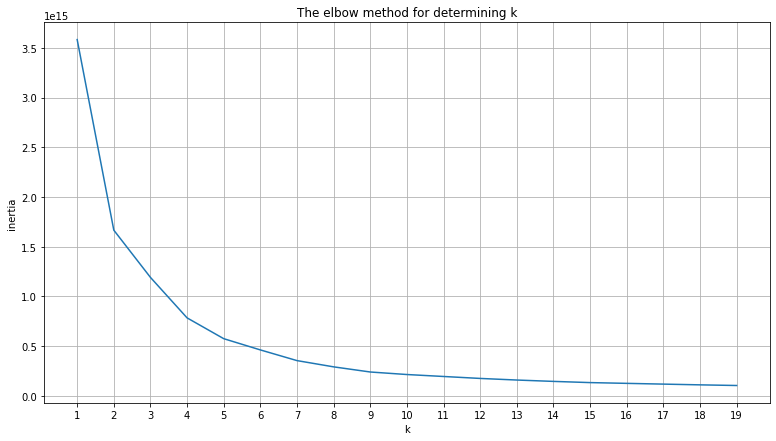

In [345]:

# create the list of the features to cluster on
loc_features = ['latitude','longitude', 'regionidzip', 'fips']

# lets plot the k and inertia

explore.get_k_val_from_elbow(train_scaled, features = loc_features)



In [346]:
# lets keep k as 5

# creating the object
kmeans1 = KMeans(n_clusters = 5, max_iter = 500)

# fitting the object
kmeans1.fit(train_scaled[loc_features])

# predicting using the kmeans object
y_kmeans1 = kmeans1.predict(train_scaled[loc_features])
y_kmeans1

array([0, 1, 2, ..., 4, 2, 1], dtype=int32)

array([[ 3.42579126e+07, -1.18620475e+08,  9.65230293e+04,
         6.05908785e+03],
       [ 3.39085352e+07, -1.17950246e+08,  9.66012313e+04,
         6.04752916e+03],
       [ 3.36224363e+07, -1.17731392e+08,  9.69811690e+04,
         6.05900000e+03],
       [ 3.46335386e+07, -1.18131568e+08,  9.73224655e+04,
         6.03700000e+03],
       [ 3.39925331e+07, -1.18265425e+08,  9.61728765e+04,
         6.03700000e+03]])

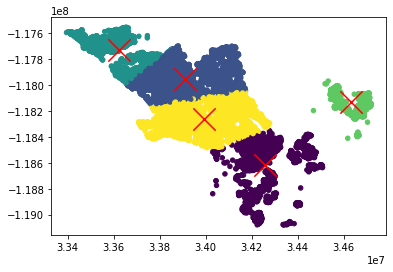

In [347]:
# ploting the centroids
plt.scatter(train[loc_features].iloc[:, 0], train[loc_features].iloc[:, 1], c=y_kmeans1, s=20, cmap='viridis')
centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=500, alpha=1, marker = 'x')
centers

In [348]:
# lets add our prediction to the dataframe
train_scaled['loc_cluster'] = y_kmeans1

**Secondly, we will create clusters using the variables that are features of the property. We will name these variables house_features**
- Variables used:
    - scaled_bathroomcnt
    - scaled_bedroomcnt
    - scaled_calculatedfinishedsquarefeet
    - scaled_fullbathcnt
    - scaled_lotsizesquarefeet
    - scaled_roomcnt
    - scaled_bathtobed
    - scaled_age

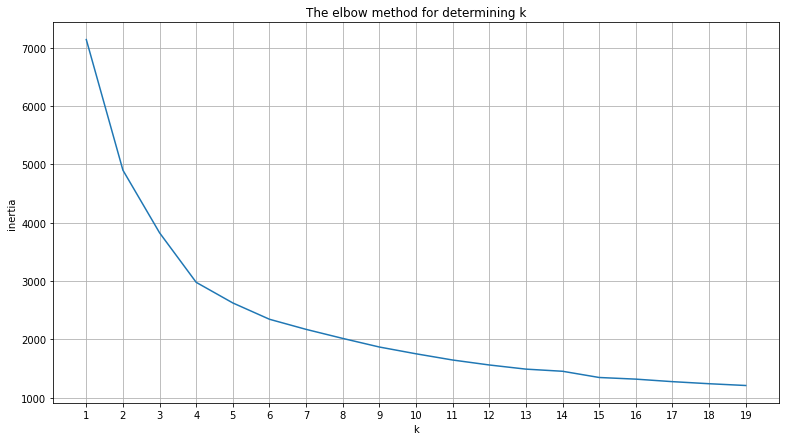

In [349]:
# create the list of the features to cluster on

house_features = ['scaled_bathroomcnt', 'scaled_bedroomcnt','scaled_calculatedfinishedsquarefeet', 'scaled_fullbathcnt',
                              'scaled_lotsizesquarefeet','scaled_roomcnt', 'scaled_bathtobed', 'scaled_age']


# lets plot the k and inertia

explore.get_k_val_from_elbow(train_scaled, features = house_features)


In [350]:
# lets keep k as 5

# creating the object
kmeans2 = KMeans(n_clusters = 5, max_iter = 500)

# fitting the object
kmeans2.fit(train_scaled[house_features])

#predicting using the kmeans object
y_kmeans2 = kmeans2.predict(train_scaled[house_features])

array([[ 5.05853358e-01,  6.87492298e-01,  5.29408401e-01,
         4.59272951e-01,  5.31425800e-01,  6.38724584e-01,
         2.37420415e-01,  3.46265750e-01],
       [ 3.44420824e-01,  3.77724980e-01,  3.41636076e-01,
         3.34083615e-01,  4.84307858e-01,  1.14626318e-04,
         2.65200144e-01,  4.28588201e-01],
       [ 6.65726817e-04,  1.57973058e-01,  1.91285514e-01,
        -2.16493490e-14,  4.15636860e-01,  3.61058897e-02,
         1.23662020e-01,  5.65145569e-01],
       [ 6.79652382e-01,  5.94046549e-01,  5.86399192e-01,
         6.70862052e-01,  5.25149636e-01,  3.14653881e-03,
         3.50859055e-01,  2.90650513e-01],
       [ 3.48545637e-01,  2.99342472e-01,  3.32336626e-01,
         3.01014154e-01,  4.12179469e-01,  5.11116683e-01,
         2.91338831e-01,  3.65230552e-01]])

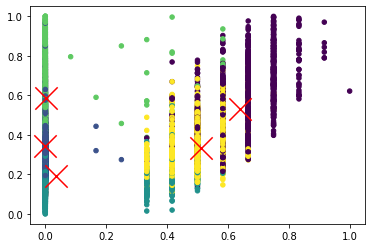

In [351]:
# ploting the centroids 
plt.scatter(train_scaled[house_features].iloc[:, 5], train_scaled[house_features].iloc[:, 2], c=y_kmeans2, s=20, cmap='viridis')
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 5], centers[:, 2], c='red', s=500, alpha=1, marker = 'x')
centers

In [352]:
# lets append our clusters into the dataframe

train_scaled['house_features_cluster'] = y_kmeans2

**Finally, lets use various values to create the clusters. We will name these variables value_features.**
- Variables used are:
    - scaled_structuretaxvaluedollarcnt
    - scaled_taxvaluedollarcnt
    - scaled_landtaxvaluedollarcnt
    - scaled_taxamount
    - scaled_pricepersqfeet


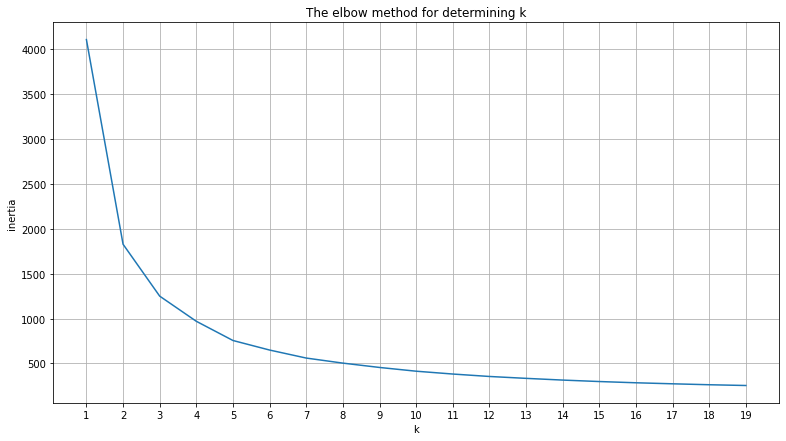

In [353]:

# create the list of the features to cluster on

value_features = ['scaled_structuretaxvaluedollarcnt', 'scaled_taxvaluedollarcnt',
       'scaled_landtaxvaluedollarcnt', 'scaled_taxamount', 'scaled_pricepersqfeet']

# lets plot the k and inertia

explore.get_k_val_from_elbow(train_scaled, features = value_features)

In [354]:
# lets keep k as 5


# creating the object
kmeans3 = KMeans(n_clusters = 5, max_iter = 500)

# fitting the object
kmeans3.fit(train_scaled[value_features])

y_kmeans3 = kmeans3.predict(train_scaled[value_features])

array([[0.68027918, 0.45411233, 0.27765043, 0.50652717, 0.28003005],
       [0.56297082, 0.72139171, 0.69329333, 0.75112919, 0.24396733],
       [0.14675821, 0.0943565 , 0.05528808, 0.12558976, 0.08750352],
       [0.33188806, 0.25613924, 0.18199938, 0.30272542, 0.18763532],
       [0.30086259, 0.45830043, 0.46824575, 0.49195655, 0.17914194]])

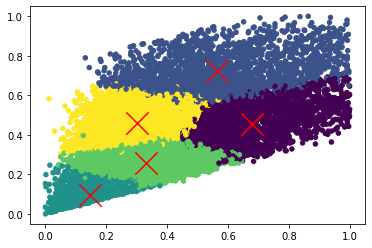

In [355]:
# lets plot the centroids

plt.scatter(train_scaled[value_features].iloc[:, 0], train_scaled[value_features].iloc[:, 1], c=y_kmeans3, s=20, cmap='viridis')
centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=500, alpha=1, marker = 'x')
centers

In [356]:
# lets append the clusters into our dataframe

train_scaled['value_features_cluster'] = y_kmeans3


**Lets check how the log error distributes amongst the clusters**
- We will use ANOVA to compare the mean of the different clusters

**Location Clusters**

$H_0$: There is no difference in the log error between different clusters

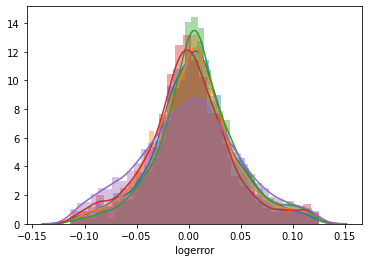

In [357]:
a = 0.05
x0 = train_scaled[train_scaled.loc_cluster == 0].logerror
x1 = train_scaled[train_scaled.loc_cluster == 1].logerror
x2 = train_scaled[train_scaled.loc_cluster == 2].logerror
x3 = train_scaled[train_scaled.loc_cluster == 3].logerror
x4 = train_scaled[train_scaled.loc_cluster == 4].logerror


# lets check their distribution
sns.distplot(x0)
sns.distplot(x1)
sns.distplot(x2)
sns.distplot(x3)
sns.distplot(x4)
plt.show()

In [358]:
# Run ANOVA test
f, p = f_oneway(x0,x1,x2, x3, x4)
f, p

if p < a:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


**Features Cluster**

$H_0$: There is no difference in the log error between different clusters


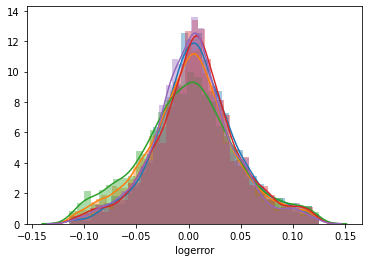

In [359]:
a = 0.05
x0 = train_scaled[train_scaled.house_features_cluster == 0].logerror
x1 = train_scaled[train_scaled.house_features_cluster == 1].logerror
x2 = train_scaled[train_scaled.house_features_cluster == 2].logerror
x3 = train_scaled[train_scaled.house_features_cluster == 3].logerror
x4 = train_scaled[train_scaled.house_features_cluster == 4].logerror


# lets check their distribution
sns.distplot(x0)
sns.distplot(x1)
sns.distplot(x2)
sns.distplot(x3)
sns.distplot(x4)
plt.show()

In [360]:
# Run ANOVA test
f, p = f_oneway(x0,x1,x2, x3, x4)
f, p

if p < a:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


**Value Cluster**

$H_0$: There is no difference in the log error between different clusters


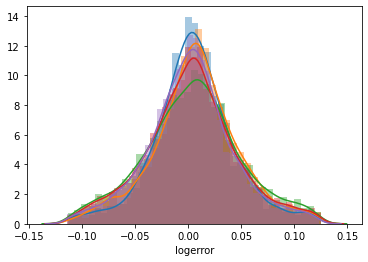

In [361]:
a = 0.05
x0 = train_scaled[train_scaled.value_features_cluster == 0].logerror
x1 = train_scaled[train_scaled.value_features_cluster == 1].logerror
x2 = train_scaled[train_scaled.value_features_cluster == 2].logerror
x3 = train_scaled[train_scaled.value_features_cluster == 3].logerror
x4 = train_scaled[train_scaled.value_features_cluster == 4].logerror


# lets check their distribution
sns.distplot(x0)
sns.distplot(x1)
sns.distplot(x2)
sns.distplot(x3)
sns.distplot(x4)
plt.show()

In [362]:
# Run ANOVA test
f, p = f_oneway(x0,x1,x2, x3, x4)
f, p

if p < a:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


**Takeaways**
- There is a statistically significant difference in the mean log error between different clusters created  using different group of features
- We can then use them as features for our model

## Model & Evaluate

In [418]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np



In [419]:
# lets create our baseline

print(f'The median of the logerror is: {train_scaled.logerror.median()}')

print()
print(f'The mean of the logerror is: {train_scaled.logerror.mean()}')

# we will go with the mean

baseline = train_scaled.logerror.mean()

# predict with baseline
y_pred_baseline = np.full(len(train), baseline)

baseline_rmse = (mean_squared_error(train_scaled.logerror, y_pred_baseline)) **(1/2)
print()
print(f'The base line RMSE using mean as the baseline is:{baseline_rmse}')

The median of the logerror is: 0.00398609553154

The mean of the logerror is: 0.0037164228993862964

The base line RMSE using mean as the baseline is:0.0428883995422678


**We will use location cluster to model**
- For this we will have to encode the clusters
- So we are going to make a copy of the dataframe
- Use that copy to encode the clusters, drop the original columns and fit with the model and predict
- We will have to repeat this process for different clusters that we created using other features


In [420]:
# making a copy of the dataframe to encode the clusters
train_scaled_modeling = train_scaled


In [421]:
# encoding the location clusters

train_scaled_modeling = explore.encode_clusters(train_scaled_modeling, 'loc_cluster')

In [422]:
train_scaled_modeling

,id,parcelid,fips,latitude,longitude,propertycountylandusecode,regionidcity,regionidcounty,regionidzip,yearbuilt,...,scaled_pricepersqfeet,scaled_age,scaled_bathtobed,house_features_cluster,value_features_cluster,is_cluster_0,is_cluster_1,is_cluster_2,is_cluster_3,is_cluster_4
74617,672837,10829183,6037.0,34199865.0,-118454861.0,0100,12447.0,3101.0,96414.0,1949.0,...,0.206334,0.511450,0.261111,1,4,1,0,0,0,0
56140,1442644,13986612,6059.0,33820949.0,-117985551.0,122,16764.0,1286.0,97023.0,1955.0,...,0.068629,0.465649,0.261111,4,2,0,1,0,0,0
64845,1160533,14309513,6059.0,33661615.0,-117824423.0,122,52650.0,1286.0,96947.0,1967.0,...,0.175162,0.374046,0.444444,4,4,0,0,1,0,0
20892,2424519,12736577,6037.0,33911002.0,-117994037.0,0100,5465.0,3101.0,96190.0,1985.0,...,0.284246,0.236641,0.305556,3,0,0,1,0,0,0
41369,2420965,11855148,6037.0,34042065.0,-118122329.0,0100,6021.0,3101.0,96497.0,1954.0,...,0.075409,0.473282,0.261111,1,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3944,2577575,14456010,6059.0,33541654.0,-117667523.0,122,12773.0,1286.0,96996.0,1970.0,...,0.186900,0.351145,0.261111,4,4,0,0,1,0,0
69733,248081,12891217,6037.0,34067570.0,-117769204.0,0100,20008.0,3101.0,96508.0,1979.0,...,0.148670,0.282443,0.166667,1,3,0,1,0,0,0
75693,336605,12696717,6037.0,33750345.0,-118316263.0,0100,54053.0,3101.0,96122.0,1956.0,...,0.114933,0.458015,0.261111,1,2,0,0,0,0,1
29078,2025796,14363960,6059.0,33684020.0,-117625427.0,122,32380.0,1286.0,96989.0,1986.0,...,0.222089,0.229008,0.261111,4,4,0,0,1,0,0


**Since the cluster were created using the location features, using the same features as well as the clusters to model will result in multicollinearity. So, lets try using the clusters and the features that were not used to create those clusters**

In [423]:
# lets model
# create the object
l_m = LinearRegression(normalize = True)

# we will use the location cluster and the features we used to get that cluster as the x vars

x1 = train_scaled_modeling[['scaled_bathroomcnt', 'scaled_bedroomcnt','scaled_calculatedfinishedsquarefeet', 'scaled_fullbathcnt',
                              'scaled_lotsizesquarefeet','scaled_roomcnt', 'scaled_age', 'scaled_bathtobed','is_cluster_0',
                            'is_cluster_1','is_cluster_2','is_cluster_3','is_cluster_4','scaled_structuretaxvaluedollarcnt', 'scaled_taxvaluedollarcnt',
       'scaled_landtaxvaluedollarcnt', 'scaled_taxamount', 'scaled_pricepersqfeet']]
y1 = train_scaled_modeling.logerror


# fit the object
l_m = l_m.fit(x1, y1)


# predict with the object
y_pred1 = l_m.predict(x1)

# get rmse

l_m_rmse = (mean_squared_error(y1, y_pred1)) **(1/2)
l_m_rmse
print(f'Our linear model rmse using the location clusters is: {l_m_rmse}')
print()
print(f'Our baseline rmse is: {baseline_rmse}')
print()
print(f'Our model beat the baseline by {baseline_rmse - l_m_rmse}')

Our linear model rmse using the location clusters is: 0.04264295773650016

Our baseline rmse is: 0.0428883995422678

Our model beat the baseline by 0.00024544180576763913


**Lets try house features clusters**

In [424]:
# making a copy of the dataframe to encode the clusters
train_scaled_modeling = train_scaled

In [425]:
# encoding the house features cluster
train_scaled_modeling = explore.encode_clusters(train_scaled_modeling, 'house_features_cluster')

In [426]:
x2 = train_scaled_modeling[[ 'scaled_structuretaxvaluedollarcnt', 'scaled_taxvaluedollarcnt',
       'scaled_landtaxvaluedollarcnt', 'scaled_taxamount', 'scaled_pricepersqfeet', 
                 'is_cluster_0','is_cluster_1','is_cluster_2','is_cluster_3','is_cluster_4' ]]
y2 = train_scaled_modeling.logerror

# lets create the model object
l_m2 = LinearRegression(normalize = True)

# fit the object
l_m2 = l_m2.fit(x2, y2)


# predict with the object
y_pred2 = l_m2.predict(x2)

# get rmse

l_m2_rmse = (mean_squared_error(y2, y_pred2)) **(1/2)
l_m2_rmse

print(f'Our linear model rmse using the location clusters is: {l_m2_rmse}')
print()
print(f'Our baseline rmse is: {baseline_rmse}')
print()
print(f'Our model beat the baseline by {baseline_rmse - l_m2_rmse}')

Our linear model rmse using the location clusters is: 0.042728125262603396

Our baseline rmse is: 0.0428883995422678

Our model beat the baseline by 0.00016027427966440466


**Lets use house value features**

In [427]:
# making a copy of the dataframe to encode the clusters

train_scaled_modeling = train_scaled

In [428]:
# encoding the house features cluster

train_scaled_modeling = explore.encode_clusters(train_scaled_modeling, 'value_features_cluster')

In [429]:
# lets try the value_features cluster and the features we used to create that cluster as our X variables

x3 = train_scaled_modeling[['scaled_bathroomcnt', 'scaled_bedroomcnt','scaled_calculatedfinishedsquarefeet', 'scaled_fullbathcnt',
                              'scaled_lotsizesquarefeet','scaled_roomcnt', 'scaled_age', 'scaled_bathtobed',
             'is_cluster_0','is_cluster_1','is_cluster_2','is_cluster_3','is_cluster_4']]

y3 =  train_scaled_modeling.logerror

# lets create the model object
l_m3 = LinearRegression(normalize = True)

# fit the object
l_m3 = l_m3.fit(x3, y3)


# predict with the object
y_pred3 = l_m3.predict(x3)

# get rmse

l_m3_rmse = (mean_squared_error(y3, y_pred3)) **(1/2)
l_m3_rmse


print(f'Our linear model rmse using the location clusters is: {l_m3_rmse}')
print()
print(f'Our baseline rmse is: {baseline_rmse}')
print()
print(f'Our model beat the baseline by {baseline_rmse - l_m3_rmse}')

Our linear model rmse using the location clusters is: 0.04269585140077978

Our baseline rmse is: 0.0428883995422678

Our model beat the baseline by 0.0001925481414880234


**Lets create a model without clusters**
- this model will be fitted with all the features that we used to create the clusters.

In [430]:
x = train_scaled[['scaled_bathroomcnt', 'scaled_bedroomcnt','scaled_calculatedfinishedsquarefeet', 'scaled_fullbathcnt',
                              'scaled_lotsizesquarefeet','scaled_roomcnt', 'scaled_age', 'scaled_bathtobed',
                 'scaled_structuretaxvaluedollarcnt', 'scaled_taxvaluedollarcnt',
       'scaled_landtaxvaluedollarcnt', 'scaled_taxamount', 'scaled_pricepersqfeet']]
y = train_scaled.logerror

In [431]:
# create the model object

lm = LinearRegression(normalize = True)


# fit the model object
lm = lm.fit(x,y)

# predict with the model object
y_pred = lm.predict(x)


# calculate rmse
rmse = (mean_squared_error(y, y_pred)) ** (1/2)


print(f'The baseline RMSE is: {baseline_rmse}')
print()
print(f'Model without the clusters RMSE is: {rmse}')
print()
print(f'Our linear model3 rmse using the location clusters is: {l_m3_rmse}')
print()
print(f'Our linear model2 rmse using the location clusters is: {l_m2_rmse}')
print()
print(f'Our linear model1 rmse using the location clusters is: {l_m_rmse}')


The baseline RMSE is: 0.0428883995422678

Model without the clusters RMSE is: 0.04268122198380494

Our linear model3 rmse using the location clusters is: 0.04269585140077978

Our linear model2 rmse using the location clusters is: 0.042728125262603396

Our linear model1 rmse using the location clusters is: 0.04264295773650016


**Takeaways**
- All of the models beat the baseline performance
- However, the model without the clusters beat linear model 2 and 3
- Since the goal is to cluster, we will use the models that use clusters as features to validate
- The models with clusters are:
    - l_m
    - l_m2
    - l_m3
    
**Lets add clusters into our validate and test dataset**

In [432]:
# appending clusters to our scaled validate data set


validate_scaled['loc_cluster'] = kmeans1.predict(validate_scaled[loc_features])
validate_scaled['house_features_cluster'] = kmeans2.predict(validate_scaled[house_features])
validate_scaled['value_features_cluster'] = kmeans3.predict(validate_scaled[value_features])

In [433]:
# appending clusters to our scaled test data set

test_scaled['loc_cluster'] = kmeans1.predict(test_scaled[loc_features])
test_scaled['house_features_cluster'] = kmeans2.predict(test_scaled[house_features])
test_scaled['value_features_cluster'] = kmeans3.predict(test_scaled[value_features])

In [434]:
# making a copy of the dataframe to encode the clusters 
validate_scaled_modeling = validate_scaled

In [435]:
# encoding the location clusters
validate_scaled_modeling = explore.encode_clusters(validate_scaled_modeling, 'loc_cluster')

In [436]:
# getting our x and y variables
x1_val = validate_scaled_modeling[['scaled_bathroomcnt', 'scaled_bedroomcnt','scaled_calculatedfinishedsquarefeet', 'scaled_fullbathcnt',
                              'scaled_lotsizesquarefeet','scaled_roomcnt', 'scaled_age', 'scaled_bathtobed','is_cluster_0',
                            'is_cluster_1','is_cluster_2','is_cluster_3','is_cluster_4','scaled_structuretaxvaluedollarcnt', 'scaled_taxvaluedollarcnt',
       'scaled_landtaxvaluedollarcnt', 'scaled_taxamount', 'scaled_pricepersqfeet']]
y1_val = validate_scaled_modeling.logerror

# predicting with the lm model

y_val_pred1 = l_m.predict(x1_val)

# getting the rmse
val1_rmse = (mean_squared_error(y1_val, y_val_pred1)) **(1/2)
val1_rmse - baseline_rmse

print(f'The RMSE using linear model 1 with validate data is: {val1_rmse}')
print()
print(f'The RMSE using baseline with validate data is: {baseline_rmse}')
print()
print(f'Is baseline model better than linear model 1?: {baseline_rmse < val1_rmse}')

The RMSE using linear model 1 with validate data is: 0.04334482347090511

The RMSE using baseline with validate data is: 0.0428883995422678

Is baseline model better than linear model 1?: True


In [437]:
# make a copy of the dataframe to encode clusters

validate_scaled_modeling = validate_scaled

In [438]:
# encoding the house features clusters
validate_scaled_modeling = explore.encode_clusters(validate_scaled_modeling, 'house_features_cluster')

In [439]:
x2_val = validate_scaled_modeling[['scaled_structuretaxvaluedollarcnt', 'scaled_taxvaluedollarcnt',
       'scaled_landtaxvaluedollarcnt', 'scaled_taxamount', 'scaled_pricepersqfeet', 
                 'is_cluster_0','is_cluster_1','is_cluster_2','is_cluster_3','is_cluster_4' ]]
y2_val = validate_scaled_modeling.logerror


y_val_pred2 = l_m2.predict(x2_val)

val2_rmse = (mean_squared_error(y2_val, y_val_pred2)) **(1/2)
print(f'The RMSE using linear model 2 with validate data is: {val2_rmse}')
print()
print(f'The RMSE using baseline with validate data is: {baseline_rmse}')
print()
print(f'Is baseline model better than linear model 2?: {baseline_rmse < val2_rmse}')

The RMSE using linear model 2 with validate data is: 0.04338868316590747

The RMSE using baseline with validate data is: 0.0428883995422678

Is baseline model better than linear model 2?: True


In [440]:
# make a copy of the dataframe to encode clusters

validate_scaled_modeling = validate_scaled

In [441]:
# encoding the value clusters
validate_scaled_modeling = explore.encode_clusters(validate_scaled_modeling, 'value_features_cluster')

In [442]:
x3_val = validate_scaled_modeling[['scaled_bathroomcnt', 'scaled_bedroomcnt','scaled_calculatedfinishedsquarefeet', 'scaled_fullbathcnt',
                              'scaled_lotsizesquarefeet','scaled_roomcnt', 'scaled_age', 'scaled_bathtobed',
             'is_cluster_0','is_cluster_1','is_cluster_2','is_cluster_3','is_cluster_4']]
y3_val = validate_scaled_modeling.logerror


y_val_pred3 = l_m3.predict(x3_val)

val3_rmse = (mean_squared_error(y3_val, y_val_pred3)) **(1/2)
print(f'The RMSE using linear model 3 with validate data is: {val3_rmse}')
print()
print(f'The RMSE using baseline with validate data is: {baseline_rmse}')
print()
print(f'Is baseline model better than linear model 3?: {baseline_rmse < val3_rmse}')

The RMSE using linear model 3 with validate data is: 0.04331759243200388

The RMSE using baseline with validate data is: 0.0428883995422678

Is baseline model better than linear model 3?: True


**Takeaways:**
- With validate data, the model rmse was higher than baseline rmse
- l_m3 performed better compared to other 2 with validate data set
- We will use l_m3 with test data

In [443]:
# make a copy of the scaled test dataframe to encode the clusters

test_scaled_modeling = test_scaled

In [444]:
# encoding the value clusters
test_scaled_modeling = explore.encode_clusters(test_scaled_modeling, 'value_features_cluster')

In [445]:
x_test = test_scaled_modeling[['scaled_bathroomcnt', 'scaled_bedroomcnt','scaled_calculatedfinishedsquarefeet', 'scaled_fullbathcnt',
                              'scaled_lotsizesquarefeet','scaled_roomcnt', 'scaled_age', 'scaled_bathtobed',
             'is_cluster_0','is_cluster_1','is_cluster_2','is_cluster_3','is_cluster_4']]
y_test = test_scaled_modeling.logerror


y_test_pred = l_m3.predict(x_test)

test_rmse = (mean_squared_error(y_test, y_test_pred)) **(1/2)
print(f'The RMSE using linear model 3 with test data is: {test_rmse}')
print()
print(f'The RMSE using baseline with validate data is: {baseline_rmse}')
print()
print(f'Is baseline model better than linear model 3: {baseline_rmse < test_rmse}')

The RMSE using linear model 3 with test data is: 0.04306804234862022

The RMSE using baseline with validate data is: 0.0428883995422678

Is baseline model better than linear model 3: True


**Takeaways:**
- Testing our model with out of sample dataset resulted in rmse higher than baseline rmse


## Conclusion:
- Different features were grouped into one and were clustered.
    - Location_features: latitude, longitude, regionidzip, fips
    - House_features: bedroom count, bathroom count, square feet, full bath, lot size, age, bath to bed ratio
    - Value_features: tax amount, property value, structure tax value, land tax value, price per square feet
- Each time the number of clusters(k) was set at 5
- The clusters were then encoded and used to train the model
- The model with clusters incorporated performed better than the baseline, and the model without the clusters on training data
- The models were then validated, their performance did not beat the baseline
- Out of three validated with test data, one with smaller RMSE was tested with Test data, the model's performance did not beat the baseline
- Maybe more time is needed to dig other possible combination of features to cluster
- Or maybe, clustering is not a best fitted method for this data